# Lekce 5

## Statistická rozdělení

Vraťme se k našim datům o pacientkách. 

In [4]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("diabetes.csv")
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data = data[data["BloodPressure"] > 0]
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,3.855389,121.042292,72.405184,21.444748,83.609823,32.292769,0.475861,33.361528,0.343793
std,3.358106,32.179943,12.382158,15.705756,116.606997,7.271540,0.334179,11.837077,0.475297
min,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,45.000000,32.300000,0.380000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,130.000000,36.600000,0.629000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='BloodPressure', ylabel='Count'>

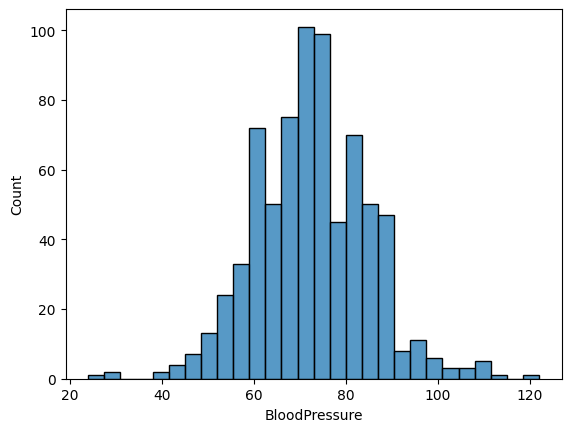

In [10]:
sns.histplot(data=data, x="BloodPressure")

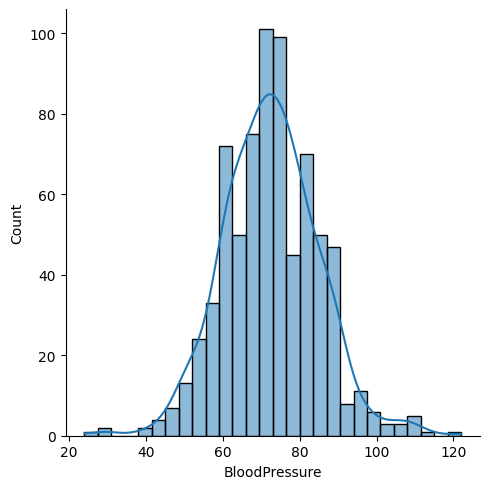

In [12]:
sns.displot(data=data, x="BloodPressure", kde=True)

Pokud máme funkci hustoty, je to nejlepší možný popis jakýchkoli dat. Postupem času bylo zjištěno, že hustoty mnohých dat mají podobný tvar. Například níže máme čtyři funkce, které jsou sice různé (mají různě vysoké maximum a jsou různé "roztažené"), ale tvar mají podobný. Všechny čtyři hustoty mají stejné tzv. **statistické rozdělení**. To znamená, že všechny čtyři hustoty lze popsat stejnou matematickou funkcí, která se liší pouze proměnnými (konkrétně průměrem a rozptylem). Statistické rozdělení těchto hustot označujeme jako **normální (Gaussovo) rozdělení**.

![](https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg)

Normální rozdělení má spousta "jevů", které se vyskytují v přírodě, například délka, výška nebo hmotnost živé tkáně, krevní tlak lidí atd. Používá se také ve financích na oceňování opcí (např. v Black–Scholesově modelu). Normální rozdělení mají často i chyby měření při experimentech.

Vedle normálního rozdělení existuje spousta dalších. Jedním z nich je například exponenciální rozdělení. Exponenciální rozdělení často má délka intervalu mezi dvěma náhodnými událostmi, například příchozími telefonáty v call centru, nebo čas rozpadu radioaktivní částice.

![](https://upload.wikimedia.org/wikipedia/commons/0/02/Exponential_probability_density.svg)

Rovnoměrné rozdělení má pro každé dva stejně široké intervaly stejnou pravděpodobnost, jeho hustota je konstantní funkce. Pro rovnoměrné rozdělení uvažujeme krajní hodnoty *a* a *b*, mimo tyto krajní hodnoty je pravděpodobnost 0.

![](https://upload.wikimedia.org/wikipedia/commons/9/96/Uniform_Distribution_PDF_SVG.svg)

Rovnoměrné rozdělení existuje ve verzi pro celá i desetinná čísla, pro celá čísla bychom neměli graf hustoty čárový graf, ale graf by se skládal z "teček". Rovnoměrné rozdělení mají (resp. by měly mít) jevy, které souvisí s hazardními hrami. U hracích kostek či rulety by měla být pravděpodobnost padnutí každého z čísel stejná.

![](images/Uniform_discrete_pmf_svg.svg)

## Ověření předpokladů testu



## Přehled statistických testů v Pythonu

Tato část vám pomůže s výběrem vhodného testu pro vaše projekty.

Při výběru testu je možné použít i rozhodovací stromy, zde je příklad [jednoho z nich](strom_1.png). Zde [druhý](strom_2.png), poněkud složitější.

### Testy s jedním statistickým souborem

Tyto testy porovnávají jeden statistický soubor (jeden sloupec tabulky) oproti nějaké skutečnosti.

#### Testy na průměr

Testy na průměr porovnávají průměr souboru dat s nějakou námi definovanou hodnotou. U testů na průměr můžeme alternativní hypotézu formulovat pomocí znaménka není rovno, menší než nebo větší než.

Níže jsou příklady dvojic hypotéz. Pro test hypotézy můžeme využít následující testy:

* [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp), který předpokládá, že data mají normální rozdělení.

* H0: Průměrná výška basketbalistek v České republice je 180 cm
* H1: Průměrná výška basketbalistek v České republice je více než 180 cm

In [8]:
import pandas
from scipy import stats

data = [170, 180, 175, 183, 178, 182, 185, 176, 179, 181]
data = pandas.DataFrame(data, columns=["sloupec_1"])
res = stats.ttest_1samp(data["sloupec_1"], 180)
print(res)

TtestResult(statistic=-0.7936270159024009, pvalue=0.44783036238501905, df=9)


* H0: Průměrná chyba při výrobě součástky do motoru je 0.1 mm
* H1: Průměrná chyba při výrobě součástky do motoru je méně než 0.1 mm

Zde v alternativní hypotéze říkáme to, že průměrná chyba je menší, proto využíváme parametr `alternative` (do něj píšeme stejné znaménko jako v alternativní hypotéze, tj. `less` nebo `greater`).

In [18]:
data = [0.12, 0.10, 0.11, 0.13, 0.09, 0.11, 0.12, 0.10, 0.11, 0.12]
data = pandas.DataFrame(data, columns=["sloupec_1"])
res = stats.ttest_1samp(data["sloupec_1"], 0.1, alternative="less")
print(res)

TtestResult(statistic=2.905487990874554, pvalue=0.00871943045417174, df=9)


* H0: Průměrné zpoždění vlaku z Prahy do Plzně s odjezdem v 18:38 je 5 minut
* H1: Průměrné zpoždění vlaku z Prahy do Plzně s odjezdem v 18:38 není 5 minut (tj. je méně nebo více než 5 minut)

In [19]:
data = [5.1, 4.9, 5.2, 4.8, 5.0, 5.1, 4.9, 5.2, 4.8, 5.0]
data = pandas.DataFrame(data, columns=["sloupec_1"])
res = stats.ttest_1samp(data["sloupec_1"], 0.1, alternative="less")
print(res)

TtestResult(statistic=103.94469683442252, pvalue=0.9999999999999982, df=9)


#### Testy na rozdělení

Příklad hypotéz:

* H0: Ceny domů mají normální rozdělení
* H1: Ceny domů nemají normální rozdělení

Pro test hypotézy můžeme využít následující testy:

* [Shapiro-Wilk test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro)
* Kombinace D'Agostinova and Pearsonova testu, který provádí funkce [normaltest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#scipy.stats.normaltest).

In [24]:
data = [0.74590569, 1.74565776, 0.58570378, 0.95159044, 0.58572699, 1.20722768, 0.38527559, 1.70051498, 1.10369079, 1.18765377, 1.7503144, 
        0.40093026, 1.2216318,  1.45744714, 1.95942974, 1.08444009, 1.07266436, 0.88722675, 0.48954167, 1.50261749, 1.27005193, 1.026523, 1.44374599, 1.54176153, 0.51657773]
data = pandas.DataFrame(data, columns=["sloupec_1"])
res = stats.shapiro(data["sloupec_1"])
res

ShapiroResult(statistic=0.9605264663696289, pvalue=0.42506101727485657)

In [25]:
res = stats.normaltest(data["sloupec_1"])
res

NormaltestResult(statistic=1.8353668908225964, pvalue=0.39944330233531283)

Pokud v hypotéze potřebujeme ověřit, zda data mají nějaké jiné rozdělení, můžeme použít [Kolmogorov-Smirnov test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest).

### Testy se dvěma statistickými soubory

Tyto testy porovnávají dva různé statistické soubory.

#### Testy na průměr

U testu na průměr máme k dispozici poměrně hodně testů.

Uvažujme nejprve párová pozorování. Párovými pozorování myslíme, že **každému pozorování z jednoho souboru** můžeme **přiřadit jiné pozorování podle nějakého logického klíče**. Například uvažujme školení pracovníků pracující u výrobní linky. Pokud máme data o rychlosti montáže pracovníků před školením (tj. počet smontovaných výrobků za jednotku času) a po školení, můžeme použít párování, protože rychlost před školením a po školení pro jednoho pracovníka tvoří párové pozorování. Pokud bychom chtěli porovnat rychlost pracovníků v jiných směnách nebo jiných závodech, nejedná se o párová pozorování.

Příklad hypotéz:

* H0: Rychlost montáže pracovníků před školením byla stejná jako po školení
* H1: Rychlost montáže pracovníků před školením byla jiná než je po školení

Pro test hypotézy můžeme použít [párový t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel). Test předpokládá, že data mají normální rozdělení.

In [40]:
data = [
    [10.5, 12.2],  # Pracovník 1
    [9.8, 11.4],   # Pracovník 2
    [10.2, 11.7],  # Pracovník 3
    [10.1, 12.3],  # Pracovník 4
    [9.9, 11.6],   # Pracovník 5
    [10.6, 12.1],  # Pracovník 6
    [9.7, 11.9],   # Pracovník 7
    [10.3, 12.0],  # Pracovník 8
    [9.6, 11.8],   # Pracovník 9
    [10.4, 12.4],  # Pracovník 10
    [10.0, 12.5],  # Pracovník 11
    [9.5, 11.3],   # Pracovník 12
    [10.7, 12.6],  # Pracovník 13
    [9.4, 11.2],   # Pracovník 14
    [10.8, 12.7]   # Pracovník 15
]
data = pandas.DataFrame(data, columns=["sloupec_1", "sloupec_2"])
res = stats.ttest_rel(data["sloupec_1"], data["sloupec_2"])
res

TtestResult(statistic=-25.03753938346132, pvalue=5.020951754927011e-13, df=14)

Pro nepárové testy můžeme mít následující hypotézy:

* H0: Rychlost montáže pracovníků v obou sledovaných směnách je stejná
* H1: Rychlost montáže pracovníků v obou sledovaných směnách je různá

Pro test hypotézy můžeme použít [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind). Test předpokládám, že data mají normální rozdělení. U testu existují dvě varianty - jedna předpokládá, že data mají stejný rozptyl, druhá uvažuje, že soubory mají různé rozptyly.

In [45]:
data = [[12.2, 12.4], [11.4, 11.5], [11.7, 11.8], [12.3, 12.2], [11.6, 11.7], 
                        [12.1, 12.3], [11.9, 11.8], [12.0, 12.1], [11.8, 11.7], [12.4, 12.5], 
                        [11.9, 12.4], [12.7, 11.4], [10.3, 12.7], [9.11, 11.3], [12.5, 12.6]]
data = pandas.DataFrame(data, columns=["sloupec_1", "sloupec_2"])
res = stats.ttest_ind(data["sloupec_1"], data["sloupec_2"])
res

Ttest_indResult(statistic=-1.1295989413722716, pvalue=0.26822987045185975)

#### Testy na rozdělení

Testy na rozdělení umožňují porovnat, zda mají dva statistické soubory stejné rozdělení, tj. zda mají stejnou distrubuční funkci. Opět rozlišujeme párový a nepárový test.

Pro párový test můžeme formulovat hypotézy:

* H0: Rozdělení rychlosti montáže pracovníků po školení je stejná jako před školením
* H1: Rozdělení rychlosti montáže pracovníků po školení je jiná než před školením

Pro test můžeme použít [Wilcoxonův test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon). Test je neparametrický, tj. nevyžaduje normální rozdělení.

In [47]:
scaled_data = [
    [18.4, 11.7], # Pracovník 1
    [11.8, 14.0], # Pracovník 2
    [14.8, 8.7], # Pracovník 3
    [13.2, 12.5], # Pracovník 4
    [16.3, 12.3], # Pracovník 5
    [9.6, 11.9], # Pracovník 6
    [14.5, 8.4], # Pracovník 7
    [13.0, 10.4], # Pracovník 8
    [11.8, 15.7], # Pracovník 9
    [11.4, 13.6], # Pracovník 10
    [9.2, 9.8], # Pracovník 11
    [13.2, 11.5], # Pracovník 12
    [12.0, 9.9], # Pracovník 13
    [11.7, 12.9], # Pracovník 14
    [13.1, 11.2] # Pracovník 15
]

data = pandas.DataFrame(data, columns=["sloupec_1", "sloupec_2"])
res = stats.wilcoxon(data["sloupec_1"], data["sloupec_2"])
res

WilcoxonResult(statistic=0.0, pvalue=6.103515625e-05)

Pro nepárová pozorování můžeme formulovat hypotézy:

* H0: Rozdělení rychlosti montáže v obou sledovaných směnách jsou stejná
* H1: Rozdělení rychlosti montáže v obou sledovaných směnách jsou různá

Pro otestování můžeme použít [Mann–Whitney test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu). Test je neparametrický, tj. nevyžaduje normální rozdělení.

In [48]:
data = [[12.2, 12.4], [11.4, 11.5], [11.7, 11.8], [12.3, 12.2], [11.6, 11.7], 
                        [12.1, 12.3], [11.9, 11.8], [12.0, 12.1], [11.8, 11.7], [12.4, 12.5], 
                        [11.9, 12.4], [12.7, 11.4], [10.3, 12.7], [9.11, 11.3], [12.5, 12.6]]
data = pandas.DataFrame(data, columns=["sloupec_1", "sloupec_2"])
res = stats.mannwhitneyu(data["sloupec_1"], data["sloupec_2"])
res

MannwhitneyuResult(statistic=99.0, pvalue=0.5889500869266057)

#### Testy závislosti kategoriálních dat

Kategoriální data jsou taková, která obecně není číslo, ale text (v řeči programování řetězec). Kategoriální proměnnou tedy může být oblíbený programovací jazyk, předmět na škole, nápoj, nejvyšší dosažené vzdělání, zda je člověk kuřák atd. Kategoriální proměnné můžeme porovnat mezi sebou a rozhodnout, zda je mezi nimi závislost.

Hypotézy mohou být například následující:

* H0: Oblíbený předmět nezávisí na pohlaví
* H1: Oblíbený předmět závisí na pohlaví

Pro test hypotézy můžeme použít [chí-kvadrát test nezávislosti](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html). Test je založený na použití kontingenční (pivot) tabulky.

In [52]:
data = [    
    ['female', 'coffee'],
    ['female', 'juice'],
    ['male', 'juice'],
    ['female', 'tea'],
    ['female', 'coffee'],
    ['male', 'juice'],
    ['female', 'coffee'],
    ['male', 'coffee'],
    ['male', 'tea'],
    ['female', 'coffee'],
    ['male', 'coffee'],
    ['male', 'coffee'],
    ['female', 'juice'],
    ['female', 'tea'],
    ['female', 'coffee'],
    ['female', 'tea'],
    ['female', 'juice'],
    ['male', 'juice'],
    ['male', 'tea'],
    ['female', 'coffee'],
    ['male', 'coffee'],
    ['male', 'coffee'],
    ['female', 'coffee'],
    ['male', 'coffee'],
    ['female', 'coffee'],
    ['female', 'coffee'],
    ['male', 'tea'],
    ['male', 'juice'],
    ['male', 'juice'],
    ['female', 'coffee'],
    ['female', 'juice'],
    ['male', 'coffee'],
    ['female', 'juice'],
    ['male', 'juice'],
    ['female', 'coffee'],
    ['female', 'tea'],
    ['male', 'juice'],
    ['female', 'juice'],
    ['female', 'tea'],
    ['male', 'juice'],
    ['male', 'coffee'],
    ['male', 'juice']
]
data = pandas.DataFrame(data, columns=["sloupec_1", "sloupec_2"])
# Pro použití testu musíme vytvořit kontingenční tabulku
data = pandas.pivot_table(data, "sloupec_1", "sloupec_1", "sloupec_2",aggfunc=len)
res = stats.chi2_contingency(data)
res

Chi2ContingencyResult(statistic=1.4818062200956932, pvalue=0.47668322366030635, dof=2, expected_freq=array([[9.95238095, 7.85714286, 4.19047619],
       [9.04761905, 7.14285714, 3.80952381]]))

#### Test statistické významnosti korelace

Test řeší, zda je zjištěná korelace statisticky významná. 

Uvažujme následující hypotézy:

H0: Cena domu a obytná plocha domu nejsou statisticky závislé
H1: Cena domu a obytná plocha domu jsou statisticky závislé

Pokud mají data normální rozdělení, lze využít test založený na [Pearsonově korelačním koeficientu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr). Pokud data nemají normální rozdělení, můžeme využít test s využitím [Spearmanova koeficientu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr) nebo [Kendallova tau](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html#scipy.stats.kendalltau).

In [53]:
# Pearson 
# Takto zjistíme výsledek, i když na tato konkrétní data bychom test založení na Pearsonově koeficientu používat neměli, data nemají normální rozdělení.

data = pandas.read_csv("house_prices.csv")
res = stats.pearsonr(data["SalePrice"], data["GrLivArea"])
res

PearsonRResult(statistic=0.7205163006738732, pvalue=1.9398503205014947e-233)

In [54]:
# Spearman
data = pandas.read_csv("house_prices.csv")
res = stats.spearmanr(data["SalePrice"], data["GrLivArea"])
res

SignificanceResult(statistic=0.7312378789702222, pvalue=7.801875110918258e-244)

In [55]:
# Kendall tau
data = pandas.read_csv("house_prices.csv")
res = stats.kendalltau(data["SalePrice"], data["GrLivArea"])
res

SignificanceResult(statistic=0.543863812013887, pvalue=1.995410251143093e-211)

### Testy se třemi a více statistickými soubory

#### Test na průměr

Test na průměr umožňuje porovnat, zda jsou průměry hodnot různé u tří a více souborů.

Pro test můžeme formulovat hypotézy:

* H0: Průměrný čas montáže je stejný u pracovníků všech tří směn
* H1: Průměrný čas montáže různý alespoň dvě směny

Uvažujme, že máme ranní, odpolední a noční směnu. Test nám pouze řekne, zda je mezi směnami nějaký rozdíl, ale nevíme přesně jaký. Může tedy být například stejný průměr ranní a odpolední směny a noční se od nich liší, může být stejný průměr ranní a noční směny a odpolední se od nich liší nebo může mít každá směna průměr odlišný od ostatních.

Pokud mají všechny soubory normální rozdělení, můžeme použít [ANOVA test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway). Pokud data nemají normální rozdělení, je možné využít neparametrický [Kruskall-Wallis test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal).
